# Project Motivation 

As we college students get older and start making real money for the first time, it is important that we are as knowledgable and possible on how to effectively manage that money. One of the most popular ways to manage and grow money over time is via stock market investing, where anyone can purchase a small stake in public companies across the world. The main concern with this is that prices of these shares fluctuate quite often over a certain time and in response to news. With these price changes, it is often much easier to lose money than it is to gain. To minimize the amount you could potentially lose, buying at the lowest price before an increase is optimal. Given this goal, Karan and I wanted to model stock prices of Alphabet Class A Stock between 2013 - 2016, supplemented by a sentimemnt analysis of news articles across the same time period. 

# Part 1: Reading in Alphabet Class A Stock Data

Link to dataset: https://www.kaggle.com/borismarjanovic/price-volume-data-for-all-us-stocks-etfs#aadr.us.txt 

New York Times API documentation: https://developer.nytimes.com/docs/articlesearch-product/1/overview 

In [0]:
import pandas as pd
import requests 
import json
from pandas.io.json import json_normalize


In [0]:
# Code to read csv file into Colaboratory:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [0]:
link = 'https://drive.google.com/open?id=1IsfFD6tPmloFiMWuja_RhzU9k1ZWHASD'
fluff, idx = link.split('=')
downloaded = drive.CreateFile({'id':idx}) 
downloaded.GetContentFile('googl.csv')  
googl_df = pd.read_csv('googl.csv', sep = ',')

In [0]:
googl_df.head()

,Date,Open,High,Low,Close,Volume,OpenInt
0,2004-08-19,50.000,52.03,47.980,50.170,44703800,0
1,2004-08-20,50.505,54.54,50.250,54.155,22857200,0
2,2004-08-23,55.375,56.74,54.525,54.700,18274400,0
3,2004-08-24,55.620,55.80,51.785,52.435,15262600,0
4,2004-08-25,52.480,54.00,51.940,53.000,9197800,0


In [0]:
# Changing Date column to date time object
googl_df['Date'] = pd.to_datetime(googl_df['Date'])
#googl_df.set_index('Date', inplace=True)

In [0]:
start_date = '2013-01-01'
end_date = '2016-12-31'
mask = (googl_df['Date'] >= start_date) & (googl_df['Date'] <= end_date)
googl_four_df = googl_df[mask]

In [0]:
googl_four_df.head

<bound method NDFrame.head of            Date    Open     High      Low   Close   Volume  OpenInt
2107 2013-01-02  359.71  363.500  358.280  361.62  5083536        0
2108 2013-01-03  362.32  365.960  360.360  361.84  4636280        0
2109 2013-01-04  364.67  370.740  363.840  368.98  5527104        0
2110 2013-01-07  367.72  369.690  365.290  367.38  3311534        0
2111 2013-01-08  367.77  368.150  362.220  366.65  3352074        0
...         ...     ...      ...      ...     ...      ...      ...
3110 2016-12-23  808.01  810.970  805.110  807.80   750685        0
3111 2016-12-27  808.68  816.000  805.800  809.93   946336        0
3112 2016-12-28  813.33  813.330  802.440  804.57  1159794        0
3113 2016-12-29  802.33  805.750  798.144  802.83   998255        0
3114 2016-12-30  803.21  803.285  789.620  792.45  1735879        0

[1008 rows x 7 columns]>

# Part 2a: Retrieving News Data via NYT REST API 

**Note that after initial webscraping is finished, the data is written to a CSV, which is in the "Project" folder. Skip the below blocks and instead read in the file via drive to save time.**

Utilizing newsapi.org to get all data related to Alphabet/Google between 2013 - 2016.

In [0]:
# default values 
key = "dntIk6KTZEo5h1RVjQ0wh9EZKsMrY6Q1"
link = ('https://api.nytimes.com/svc/search/v2/articlesearch.json?q=alphabet' + 
        '&begin_date=20130101&end_date=20161231' + '&api-key=' + key)

In [0]:
# get the number of pages of data that the API has for alphabet 
resp = requests.get(link)
first_h = resp.json()
all_news = json_normalize(first_h)
n_arts = int(all_news['response.meta.hits'])
n_pages = n_arts // 10 + 1
n_pages

87

In [0]:
# traversing through all the pages and adding the elements to a list 
import time 
articles = []
for i in range(0, n_pages): 
  new_l = link + "&page=" + str(i)
  resp = requests.get(new_l)
  hold = resp.json()
  articles.extend(hold['response']['docs'])
  if (i + 2) % 10 == 0:
    time.sleep(60)

In [0]:
# convert to DF
all_articles = json_normalize(articles)
all_articles.tail()

,abstract,web_url,snippet,lead_paragraph,source,multimedia,keywords,pub_date,document_type,news_desk,section_name,type_of_material,_id,word_count,uri,headline.main,headline.kicker,headline.content_kicker,headline.print_headline,headline.name,headline.seo,headline.sub,byline.original,byline.person,byline.organization,print_section,print_page,subsection_name,slideshow_credits
862,Two readers comment on a Sunday Review essay t...,https://www.nytimes.com/2015/06/04/opinion/the...,Two readers comment on a Sunday Review essay t...,To the Editor:,The New York Times,[],"[{'name': 'subject', 'value': 'Women and Girls...",2015-06-04T07:20:06+0000,article,Letters,Opinion,Letter,nyt://article/07629053-3e41-5b40-8ae5-8b9b1e35...,265,nyt://article/07629053-3e41-5b40-8ae5-8b9b1e35...,The Pressure to Primp,Letters,None,The Pressure to Primp,None,None,None,None,[],None,A,24,NaN,NaN
863,"Remembering some of the artists, innovators an...",https://www.nytimes.com/interactive/2015/12/16...,"Remembering some of the artists, innovators an...","Remembering some of the artists, innovators an...",The New York Times,"[{'rank': 0, 'subtype': 'watch308', 'caption':...","[{'name': 'subject', 'value': 'Deaths (Obituar...",2015-12-23T13:15:48+0000,multimedia,Magazine,Magazine,Interactive Feature,nyt://interactive/f09df3dd-47d1-54a7-9d26-05d1...,0,nyt://interactive/f09df3dd-47d1-54a7-9d26-05d1...,The Lives They Lived,Feature,None,None,None,None,None,None,[],None,NaN,NaN,NaN,NaN
864,Two teachers agree with an opinion writer abou...,https://www.nytimes.com/2015/05/26/opinion/the...,Two teachers agree with an opinion writer abou...,To the Editor:,The New York Times,"[{'rank': 0, 'subtype': 'watch308', 'caption':...","[{'name': 'subject', 'value': 'Children and Ch...",2015-05-26T07:21:19+0000,article,Letters,Opinion,Letter,nyt://article/2aab24d1-919a-5a00-9d8d-5af95255...,380,nyt://article/2aab24d1-919a-5a00-9d8d-5af95255...,The Importance of Play as a Learning Tool,Letter,None,The Importance of Play as a Learning Tool,None,None,None,None,[],None,A,18,NaN,NaN
865,"The best present ideas, selected by Times expe...",https://www.nytimes.com/interactive/2014/multi...,"The best present ideas, selected by Times expe...","The best present ideas, selected by Times expe...",The New York Times,"[{'rank': 0, 'subtype': 'wide', 'caption': Non...","[{'name': 'subject', 'value': 'Gifts', 'rank':...",2014-10-14T18:56:40+0000,multimedia,Multimedia/Photos,Multimedia/Photos,Interactive Feature,nyt://interactive/e2ec3e6f-b0b1-58e8-8537-4f18...,0,nyt://interactive/e2ec3e6f-b0b1-58e8-8537-4f18...,"2014 Holiday Gift Ideas and Guide — Movies, Mu...",None,None,None,None,None,None,None,[],None,NaN,NaN,NaN,NaN
866,Readers reflect on how we see ourselves and le...,https://www.nytimes.com/2014/03/23/opinion/sun...,Readers reflect on how we see ourselves and le...,Readers reflect on how we see ourselves and le...,The New York Times,"[{'rank': 0, 'subtype': 'wide', 'caption': Non...","[{'name': 'subject', 'value': 'Books and Liter...",2014-03-22T18:30:01+0000,article,Letters,Opinion,Letter,nyt://article/020c0074-1418-5334-81d2-15a0e71a...,988,nyt://article/020c0074-1418-5334-81d2-15a0e71a...,Diversity in Kids’ Books,Letters,None,Diversity in Kids’ Books,None,None,None,None,[],None,SR,12,Sunday Review,NaN


In [0]:
from google.colab import drive
drive.mount('drive')

Drive already mounted at drive; to attempt to forcibly remount, call drive.mount("drive", force_remount=True).


In [0]:
# write to CSV 
all_articles.to_csv('all_articles_googl.csv')
!cp all_articles_googl.csv "drive/My Drive/"

# Part 2b: Reading in Article Data via Drive CSV

In [0]:
# open and reading in CSV 
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

link = 'https://drive.google.com/open?id=1-3BMbLq2BGIRQVg4vhguypidcRLLKtOr'
fluff, idx = link.split('=')
downloaded = drive.CreateFile({'id':idx}) 
downloaded.GetContentFile('all_articles_googl.csv')  
articles_df = pd.read_csv('all_articles_googl.csv', sep = ',')

In [0]:
articles_df.tail()

,Unnamed: 0,abstract,web_url,snippet,lead_paragraph,source,multimedia,keywords,pub_date,document_type,news_desk,section_name,type_of_material,_id,word_count,uri,headline.main,headline.kicker,headline.content_kicker,headline.print_headline,headline.name,headline.seo,headline.sub,byline.original,byline.person,byline.organization,print_section,print_page,subsection_name,slideshow_credits
862,862,Two readers comment on a Sunday Review essay t...,https://www.nytimes.com/2015/06/04/opinion/the...,Two readers comment on a Sunday Review essay t...,To the Editor:,The New York Times,[],"[{'name': 'subject', 'value': 'Women and Girls...",2015-06-04T07:20:06+0000,article,Letters,Opinion,Letter,nyt://article/07629053-3e41-5b40-8ae5-8b9b1e35...,265,nyt://article/07629053-3e41-5b40-8ae5-8b9b1e35...,The Pressure to Primp,Letters,NaN,The Pressure to Primp,NaN,NaN,NaN,NaN,[],NaN,A,24.0,NaN,NaN
863,863,"Remembering some of the artists, innovators an...",https://www.nytimes.com/interactive/2015/12/16...,"Remembering some of the artists, innovators an...","Remembering some of the artists, innovators an...",The New York Times,"[{'rank': 0, 'subtype': 'watch308', 'caption':...","[{'name': 'subject', 'value': 'Deaths (Obituar...",2015-12-23T13:15:48+0000,multimedia,Magazine,Magazine,Interactive Feature,nyt://interactive/f09df3dd-47d1-54a7-9d26-05d1...,0,nyt://interactive/f09df3dd-47d1-54a7-9d26-05d1...,The Lives They Lived,Feature,NaN,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN,NaN
864,864,Two teachers agree with an opinion writer abou...,https://www.nytimes.com/2015/05/26/opinion/the...,Two teachers agree with an opinion writer abou...,To the Editor:,The New York Times,"[{'rank': 0, 'subtype': 'watch308', 'caption':...","[{'name': 'subject', 'value': 'Children and Ch...",2015-05-26T07:21:19+0000,article,Letters,Opinion,Letter,nyt://article/2aab24d1-919a-5a00-9d8d-5af95255...,380,nyt://article/2aab24d1-919a-5a00-9d8d-5af95255...,The Importance of Play as a Learning Tool,Letter,NaN,The Importance of Play as a Learning Tool,NaN,NaN,NaN,NaN,[],NaN,A,18.0,NaN,NaN
865,865,"The best present ideas, selected by Times expe...",https://www.nytimes.com/interactive/2014/multi...,"The best present ideas, selected by Times expe...","The best present ideas, selected by Times expe...",The New York Times,"[{'rank': 0, 'subtype': 'wide', 'caption': Non...","[{'name': 'subject', 'value': 'Gifts', 'rank':...",2014-10-14T18:56:40+0000,multimedia,Multimedia/Photos,Multimedia/Photos,Interactive Feature,nyt://interactive/e2ec3e6f-b0b1-58e8-8537-4f18...,0,nyt://interactive/e2ec3e6f-b0b1-58e8-8537-4f18...,"2014 Holiday Gift Ideas and Guide — Movies, Mu...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN,NaN
866,866,Readers reflect on how we see ourselves and le...,https://www.nytimes.com/2014/03/23/opinion/sun...,Readers reflect on how we see ourselves and le...,Readers reflect on how we see ourselves and le...,The New York Times,"[{'rank': 0, 'subtype': 'wide', 'caption': Non...","[{'name': 'subject', 'value': 'Books and Liter...",2014-03-22T18:30:01+0000,article,Letters,Opinion,Letter,nyt://article/020c0074-1418-5334-81d2-15a0e71a...,988,nyt://article/020c0074-1418-5334-81d2-15a0e71a...,Diversity in Kids’ Books,Letters,NaN,Diversity in Kids’ Books,NaN,NaN,NaN,NaN,[],NaN,SR,12.0,Sunday Review,NaN


# Part 3: Exploratory Data Analysis

In [0]:
# making date the dataframe index 
# googl_four_df.index = googl_four_df['Date']
googl_four_df = googl_four_df.set_index('Date')
googl_four_df.head()

,Open,High,Low,Close,Volume,OpenInt
Date,,,,,,
2013-01-02,359.71,363.50,358.28,361.62,5083536,0
2013-01-03,362.32,365.96,360.36,361.84,4636280,0
2013-01-04,364.67,370.74,363.84,368.98,5527104,0
2013-01-07,367.72,369.69,365.29,367.38,3311534,0
2013-01-08,367.77,368.15,362.22,366.65,3352074,0


In [0]:
# creating an avg between the high and low prices 

googl_four_df['avg'] = googl_four_df.apply(lambda row: (row.High + row.Low) / 2, axis=1)
googl_four_df.head()

,Open,High,Low,Close,Volume,OpenInt,avg
Date,,,,,,,
2013-01-02,359.71,363.50,358.28,361.62,5083536,0,360.890
2013-01-03,362.32,365.96,360.36,361.84,4636280,0,363.160
2013-01-04,364.67,370.74,363.84,368.98,5527104,0,367.290
2013-01-07,367.72,369.69,365.29,367.38,3311534,0,367.490
2013-01-08,367.77,368.15,362.22,366.65,3352074,0,365.185


In [0]:
googl_df['avg'] = googl_df.apply(lambda row: (row.High + row.Low) / 2, axis=1)


In [0]:
# summary statistics

mea = googl_four_df['avg'].mean()
mi = googl_four_df['avg'].min()
ma = googl_four_df['avg'].max()
med = googl_four_df['avg'].median()
sd = googl_four_df['avg'].std()

print('mean: ', mea)
print('median: ', med)
print('min: ', mi)
print('max: ', ma)
print('sd', sd)

mean:  598.2381076388884
median:  569.85
min:  350.21500000000003
max:  833.49
sd 127.5479561189933


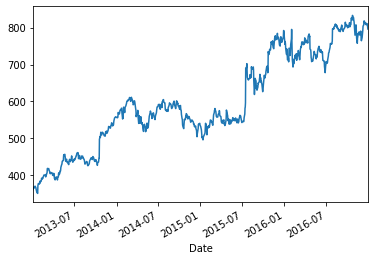

In [0]:
googl_four_df['avg'].plot.line()

In [0]:
googl_four_df['Year'] = googl_four_df.index.year
googl_four_df['Month'] = googl_four_df.index.month
googl_four_df['Weekday Name'] = googl_four_df.index.weekday_name

import calendar
googl_four_df['Month Name'] = googl_four_df['Month'].apply(lambda x: calendar.month_abbr[x])

googl_four_df.head()

,Open,High,Low,Close,Volume,OpenInt,avg,Year,Month,Weekday Name,Month Name
Date,,,,,,,,,,,
2013-01-02,359.71,363.50,358.28,361.62,5083536,0,360.890,2013,1,Wednesday,Jan
2013-01-03,362.32,365.96,360.36,361.84,4636280,0,363.160,2013,1,Thursday,Jan
2013-01-04,364.67,370.74,363.84,368.98,5527104,0,367.290,2013,1,Friday,Jan
2013-01-07,367.72,369.69,365.29,367.38,3311534,0,367.490,2013,1,Monday,Jan
2013-01-08,367.77,368.15,362.22,366.65,3352074,0,365.185,2013,1,Tuesday,Jan


In [0]:
googl_four_df.groupby('Year')['avg'].count()

Year
2013    252
2014    252
2015    252
2016    252
Name: avg, dtype: int64

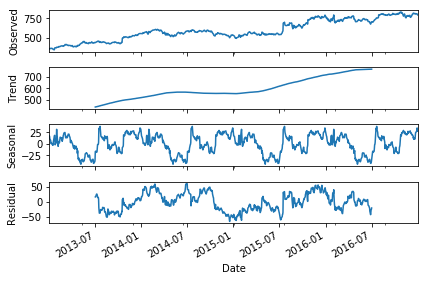

In [0]:
# plotting decomposition of time series 

import statsmodels.api as sm 
import matplotlib

# note that freq=253 since there are 252 trading days in the years (see above cell)
decomp = sm.tsa.seasonal_decompose(googl_four_df['avg'], model = 'additive',freq=252)
f = decomp.plot()
matplotlib.rcParams['figure.figsize'] = [9.0, 5.0]

There is a clear indication of trend, seasonality, and patterns in the residuals. 

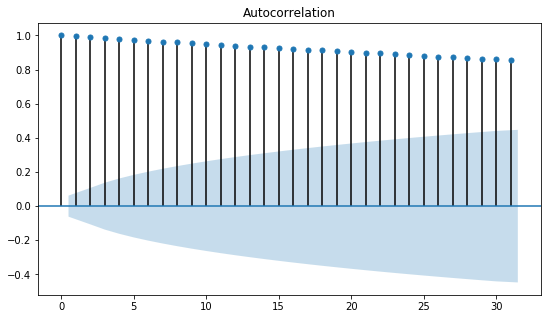

In [0]:
# plotting ACF

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt

plot_acf(googl_four_df['avg'])
plt.show()

The trend in the ACF indicates seasonality is present. 

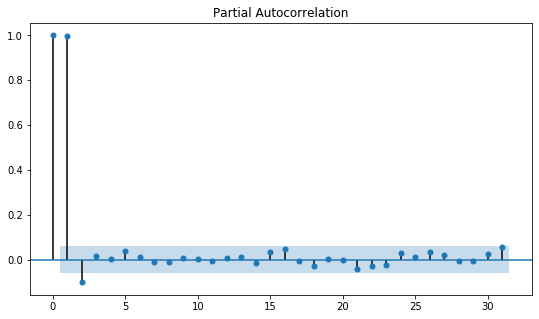

In [0]:
# plotting PACF

plot_pacf(googl_four_df['avg'])
plt.show()

The spikes in the PACF indicate that lags 1 and 2 may be potential values for p in an Autoregressive formula. 

Text(0, 0.5, 'Price')

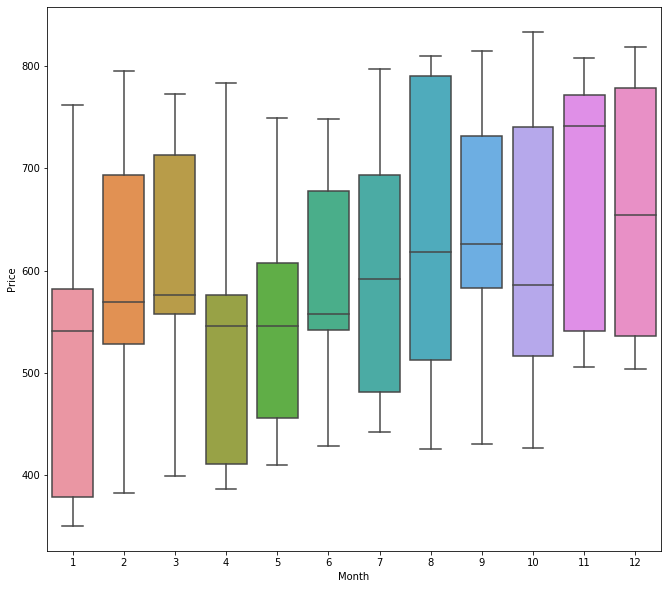

In [0]:
# boxplots to observe seasonality 

import seaborn as sns 
fig, axes = plt.subplots(1, 1, figsize=(11, 10), sharex=True)
sns.boxplot(data=googl_four_df, x='Month', y='avg', ax=axes)
axes.set_ylabel('Price')


There is clear seasonality. 

# Part 4: Machine Learning

In [0]:
y_train = googl_four_df['avg']

## Simple Linear Regression Model 

In [0]:
# Convert dates to a decimal year
date = googl_four_df.index
t = date.year + (30 * (date.month - 1) + date.day) / 365
# t = date.year + (date.month / 12)
t

Float64Index([2013.0054794520547, 2013.0082191780823, 2013.0109589041097,
              2013.0191780821917,  2013.021917808219, 2013.0246575342467,
               2013.027397260274, 2013.0301369863014, 2013.0383561643835,
               2013.041095890411,
              ...
              2016.9479452054795, 2016.9561643835616,  2016.958904109589,
              2016.9616438356165,  2016.964383561644, 2016.9671232876713,
               2016.978082191781, 2016.9808219178083, 2016.9835616438356,
               2016.986301369863],
             dtype='float64', name='Date', length=1008)

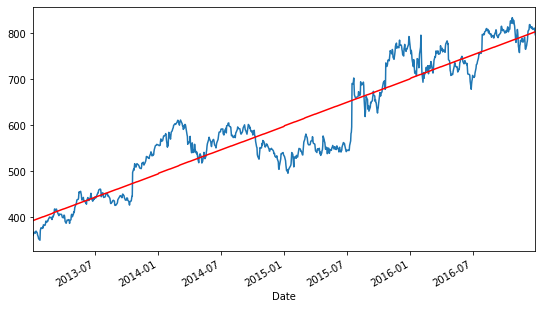

In [0]:
from sklearn.linear_model import LinearRegression

# Fit linear regression of y on t
model = LinearRegression()
model.fit(X=t.to_frame(), y=y_train)

# Predicting using the model 
y_train_ = pd.Series(
    model.predict(X=t.to_frame()),
    index=y_train.index)

# Graphing the fit 

y_train.plot.line()
y_train_.plot.line(c='red')

In [0]:
model.predict(X=t.to_frame())

array([392.91166429, 393.19376492, 393.47586556, ..., 802.23968551,
       802.52178614, 802.80388678])

## Polynomial Regression Model with Seasonality 

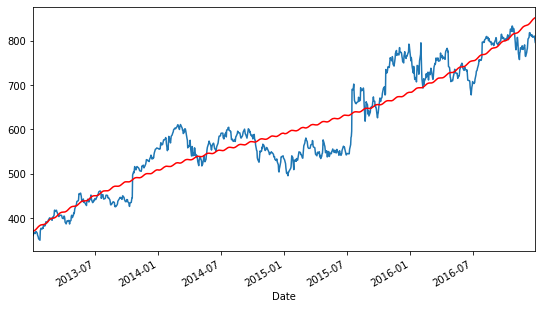

In [0]:
import numpy as np
from sklearn.preprocessing import FunctionTransformer, PolynomialFeatures
from sklearn.pipeline import make_union, make_pipeline

# Fit linear regression on t, t^2, sin(2 pi t), cos(2 pi t)
pipeline = make_pipeline(
    make_union(
        PolynomialFeatures(degree=3, include_bias=False),
        FunctionTransformer(lambda t: np.sin(2 * 12 * np.pi * t)),
        FunctionTransformer(lambda t: np.cos(2 * 12 * np.pi * t))
    ),
    LinearRegression()
)
pipeline.fit(X=t.to_frame(), y=y_train)

# Store model predictions in a Series for easy plotting
y_train_ = pd.Series(
    pipeline.predict(t.to_frame()),
    index=y_train.index
)

# Plot the data and the fitted trend
y_train.plot.line()
y_train_.plot.line(c='red')

In [0]:
googl_four_df['t'] = t
googl_four_df.head()

,Open,High,Low,Close,Volume,OpenInt,avg,Year,Month,Weekday Name,Month Name,t
Date,,,,,,,,,,,,
2013-01-02,359.71,363.50,358.28,361.62,5083536,0,360.890,2013,1,Wednesday,Jan,2013.005479
2013-01-03,362.32,365.96,360.36,361.84,4636280,0,363.160,2013,1,Thursday,Jan,2013.008219
2013-01-04,364.67,370.74,363.84,368.98,5527104,0,367.290,2013,1,Friday,Jan,2013.010959
2013-01-07,367.72,369.69,365.29,367.38,3311534,0,367.490,2013,1,Monday,Jan,2013.019178
2013-01-08,367.77,368.15,362.22,366.65,3352074,0,365.185,2013,1,Tuesday,Jan,2013.021918


## Generalized Least Squares Model

Since a normal regression model does not account for the fact that errors/residuals are correlated over time, and generalized least squares does account for this.

In [0]:
exo = googl_four_df[['t', 'Weekday Name', 'Month Name']]
exo = pd.get_dummies(exo)
exo.tail()

,t,Weekday Name_Friday,Weekday Name_Monday,Weekday Name_Thursday,Weekday Name_Tuesday,Weekday Name_Wednesday,Month Name_Apr,Month Name_Aug,Month Name_Dec,Month Name_Feb,Month Name_Jan,Month Name_Jul,Month Name_Jun,Month Name_Mar,Month Name_May,Month Name_Nov,Month Name_Oct,Month Name_Sep
Date,,,,,,,,,,,,,,,,,,
2016-12-23,2016.967123,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
2016-12-27,2016.978082,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0
2016-12-28,2016.980822,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0
2016-12-29,2016.983562,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0
2016-12-30,2016.986301,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0


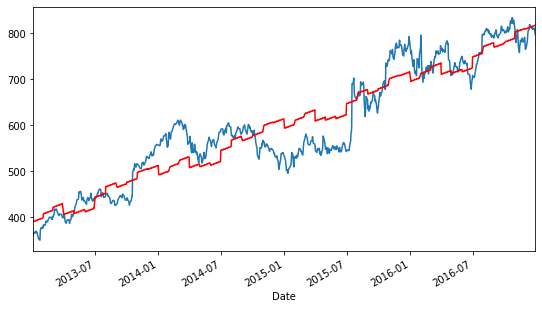

In [0]:
import statsmodels.api as sm

# price_list = prices.tolist()

first_gls = sm.GLS(endog = y_train, exog = exo)
gls1_results = first_gls.fit()
gls1_pred = gls1_results.predict(exo)

# Store model predictions in a Series for easy plotting
y_train_ = pd.Series(
    gls1_pred
)

# Plot the data and the fitted trend
y_train.plot.line()
y_train_.plot.line(c='red')


In [0]:
gls1_pred

Date
2013-01-02    390.343040
2013-01-03    391.554171
2013-01-04    391.268905
2013-01-07    391.199027
2013-01-08    392.317648
                 ...    
2016-12-23    814.885233
2016-12-27    815.933976
2016-12-28    815.905558
2016-12-29    817.116690
2016-12-30    816.831424
Length: 1008, dtype: float64

## ARIMA Models

First, to determine the validity of fitting an ARIMA model to these data, we had to test for stationarity. Test details found through this link: https://www.analyticsvidhya.com/blog/2018/09/non-stationary-time-series-python/

In [0]:
#define function for ADF test
from statsmodels.tsa.stattools import adfuller
def adf_test(timeseries):
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    dfoutput = round(dfoutput, 2)
    for key,value in dftest[4].items():
       dfoutput['Critical Value (%s)'%key] = round(value , 2)
    print (dfoutput)

#apply adf test on the series
adf_test(y_train)

Results of Dickey-Fuller Test:
Test Statistic                   -1.25
p-value                           0.65
#Lags Used                        4.00
Number of Observations Used    1003.00
Critical Value (1%)              -3.44
Critical Value (5%)              -2.86
Critical Value (10%)             -2.57
dtype: float64


The ADF test shows that there is not stationarity in the time series, which means differencing is needed for modeling this time series. 

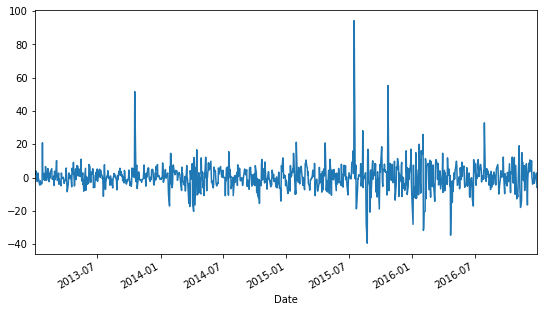

In [0]:
diff1 = y_train.diff()

# 1st Differencing
(diff1).plot.line()
# plot_acf(y_train.diff().dropna())

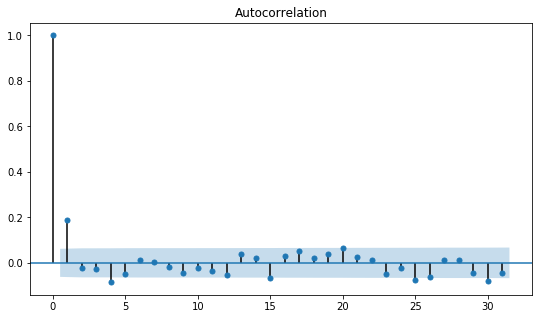

In [0]:
diff1_acf = plot_acf(diff1.dropna())

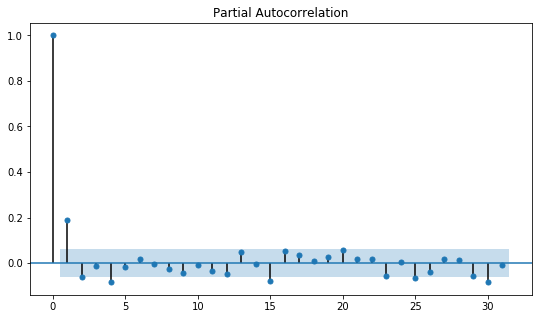

In [0]:
diff1_pacf = plot_pacf(diff1.dropna())

In [0]:
adf_test(diff1.dropna())

Results of Dickey-Fuller Test:
Test Statistic                  -16.91
p-value                           0.00
#Lags Used                        3.00
Number of Observations Used    1003.00
Critical Value (1%)              -3.44
Critical Value (5%)              -2.86
Critical Value (10%)             -2.57
dtype: float64


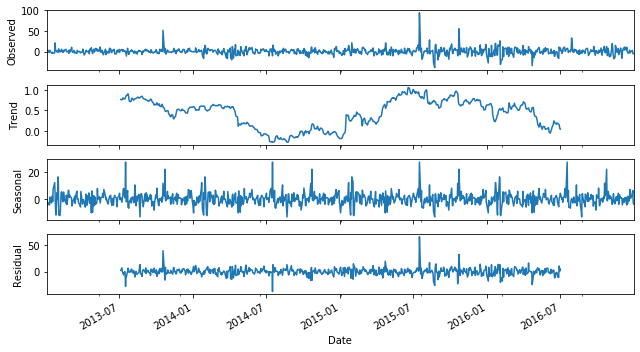

In [0]:
decomp = sm.tsa.seasonal_decompose(diff1.dropna(), model = 'additive',freq=252)
f = decomp.plot()
matplotlib.rcParams['figure.figsize'] = [9.0, 5.0]

First differencing solves the stationarity. 

In [0]:
from statsmodels.tsa.arima_model import ARIMA

model111 = ARIMA(y_train[:-252], order=(1,1,1))#, freq = 'D')
model111_fit = model111.fit(trend='nc')
print(model111_fit.summary())

                             ARIMA Model Results                              
Dep. Variable:                  D.avg   No. Observations:                  755
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -2579.419
Method:                       css-mle   S.D. of innovations              7.371
Date:                Mon, 16 Mar 2020   AIC                           5164.838
Time:                        04:58:54   BIC                           5178.718
Sample:                             1   HQIC                          5170.185
                                                                              
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
ar.L1.D.avg    -0.0844      0.192     -0.440      0.660      -0.460       0.291
ma.L1.D.avg     0.2667      0.185      1.440      0.150      -0.096       0.630
                                    Roots       

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


In [0]:
gls1_results.aic

10534.188788002451

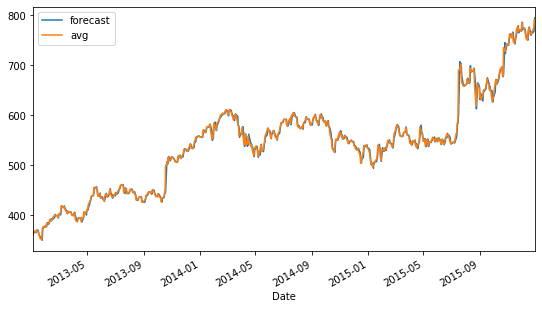

In [0]:
pl = model111_fit.plot_predict(dynamic=False)
plt.show()

In [0]:
def inverse_difference(history, yhat, interval=1):
	return yhat + history[-interval]

In [0]:
f = model111_fit.predict()
fits_arima = []
for i in range(len(f)):
  fi = inverse_difference(y_train[:-252], f[i], -i)
  fits_arima.append(fi)

fits_arima[0:5]

[360.89,
 363.55422790004195,
 367.93549139676554,
 367.35431344011886,
 364.80097762098615]

In [0]:
from sklearn.metrics import mean_squared_error

mean_squared_error(fits_arima, y_train[:-253]) ** .5

1.3474925198864283

In [0]:
forc = model111_fit.predict(start= 755, end = 1006)
edited_forecasts_2016 = []
for i in range(len(forc)):
  fi_p = inverse_difference(y_train[-252:], forc[i + 754], -i)
  edited_forecasts_2016.append(fi_p)

edited_forecasts_2016[0:5]

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:576: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)


[754.0231097109523,
 761.0096578427907,
 756.9844765498486,
 745.2849143497626,
 739.5208513833119]

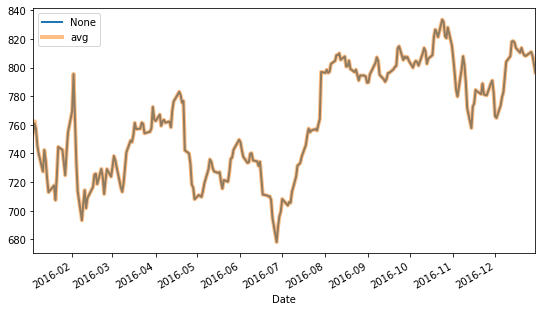

In [0]:
forecast_2016 = pd.Series(edited_forecasts_2016, index=y_train[-252:].index)
forecast_2016.plot.line(legend=True, lw=2)
y_train[-252:].plot.line(legend=True, lw = 4, alpha = .5)

In [0]:
from sklearn.metrics import mean_squared_error

mean_squared_error(forecast_2016, y_train[-252:]) ** .5

0.10417464121889002

## SARIMA Model

In [0]:
import itertools

In [0]:
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

In [0]:
y_train.index = pd.DatetimeIndex(y_train.index).to_period('D')


In [0]:
seasonal_pdq

[(0, 0, 0, 12),
 (0, 0, 1, 12),
 (0, 1, 0, 12),
 (0, 1, 1, 12),
 (1, 0, 0, 12),
 (1, 0, 1, 12),
 (1, 1, 0, 12),
 (1, 1, 1, 12)]

In [0]:
all_sarima = pd.Series()

for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(y_train, order=param, seasonal_order=param_seasonal, 
                                            enforce_stationarity=False, enforce_invertibility=False)
            results = mod.fit()
            all_sarima['ARIMA{}x{}12'.format(param, param_seasonal)] = results.aic
            #print('ARIMA{}x{}12 - AIC:{}'.format(param,param_seasonal,results.aic))
        except: 
            continue

all_sarima.idxmin()

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


'ARIMA(0, 1, 1)x(0, 1, 1, 12)12'

In [0]:
all_sarima.min()

6834.049689293803

In [0]:
mod = sm.tsa.statespace.SARIMAX(y_train, order=(1, 1, 1), seasonal_order=(1, 1, 1, 12), 
                                            enforce_stationarity=False, enforce_invertibility=False)

## Long Short Term Memory Machine Learning Implementation

This modeling technique is a form of a Recurrent Neural Network that accounts for both recent history data points and long term history data points to make predictions. 

Sources: 

https://machinelearningmastery.com/time-series-forecasting-long-short-term-memory-network-python/


In [0]:
import tensorflow as tf

### Model focused on minimizing Train Error, predictions not as good

Using TensorFlow backend.



Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where








Test RMSE: 3.384


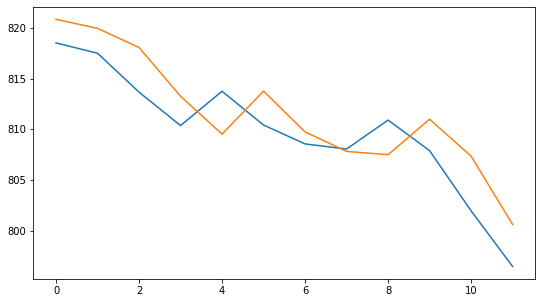

In [0]:
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from math import sqrt
from matplotlib import pyplot
import numpy as np

# frame a sequence as a supervised learning problem
def timeseries_to_supervised(data, lag=1):
	df = pd.DataFrame(data)
	columns = [df.shift(i) for i in range(1, lag+1)]
	columns.append(df)
	df = pd.concat(columns, axis=1)
	df.fillna(0, inplace=True)
	return df

# create a differenced series
def difference(dataset, interval=1):
	diff = list()
	for i in range(interval, len(dataset)):
		value = dataset[i] - dataset[i - interval]
		diff.append(value)
	return pd.Series(diff)

# invert differenced value
def inverse_difference(history, yhat, interval=1):
	return yhat + history[-interval]

# scale train and test data to [-1, 1]
def scale(train, test):
	# fit scaler
	scaler = MinMaxScaler(feature_range=(-1, 1))
	scaler = scaler.fit(train)
	# transform train
	train = train.reshape(train.shape[0], train.shape[1])
	train_scaled = scaler.transform(train)
	# transform test
	test = test.reshape(test.shape[0], test.shape[1])
	test_scaled = scaler.transform(test)
	return scaler, train_scaled, test_scaled

# inverse scaling for a forecasted value
def invert_scale(scaler, X, value):
	new_row = [x for x in X] + [value]
	array = np.array(new_row)
	array = array.reshape(1, len(array))
	inverted = scaler.inverse_transform(array)
	return inverted[0, -1]

# fit an LSTM network to training data
def fit_lstm(train, batch_size, nb_epoch, neurons):
	X, y = train[:, 0:-1], train[:, -1]
	X = X.reshape(X.shape[0], 1, X.shape[1])
	model = Sequential()
	model.add(LSTM(neurons, batch_input_shape=(batch_size, X.shape[1], X.shape[2]), stateful=True))
	model.add(Dense(1))
	model.compile(loss='mean_squared_error', optimizer='adam')
	for i in range(nb_epoch):
		model.fit(X, y, epochs=1, batch_size=batch_size, verbose=0, shuffle=False)#, validation_split = .33)
		model.reset_states()
	return model

# make a one-step forecast
def forecast_lstm(model, batch_size, X):
	X = X.reshape(1, 1, len(X))
	yhat = model.predict(X, batch_size=batch_size)
	return yhat[0,0]

# transform data to be stationary
raw_values = y_train.values
diff_values = difference(raw_values, 1)

# transform data to be supervised learning
supervised = timeseries_to_supervised(diff_values, 1)
supervised_values = supervised.values

# split data into train and test-sets
train, test = supervised_values[0:-12], supervised_values[-12:]

# transform the scale of the data
scaler, train_scaled, test_scaled = scale(train, test)

# fit the model
lstm_model = fit_lstm(train_scaled, 1, 10, 4)
# forecast the entire training dataset to build up state for forecasting
train_reshaped = train_scaled[:, 0].reshape(len(train_scaled), 1, 1)
lstm_model.predict(train_reshaped, batch_size=1)

# walk-forward validation on the test data
predictions = list()
for i in range(len(test_scaled)):
	# make one-step forecast
	X, y = test_scaled[i, 0:-1], test_scaled[i, -1]
	yhat = forecast_lstm(lstm_model, 1, X)
	# invert scaling
	yhat = invert_scale(scaler, X, yhat)
	# invert differencing
	yhat = inverse_difference(raw_values, yhat, len(test_scaled)+1-i)
	# store forecast
	predictions.append(yhat)
	expected = raw_values[len(train) + i + 1]
	# print('12/%d/16, Predicted=%f, Expected=%f' % (i+1 + 12, yhat, expected))

# report performance
rmse = sqrt(mean_squared_error(raw_values[-12:], predictions))
print('Test RMSE: %.3f' % rmse)
# line plot of observed vs predicted
pyplot.plot(raw_values[-12:]) # orange line 
pyplot.plot(predictions)
# pyplot.plot.legend()
pyplot.show()


In [0]:
len(raw_values[-12:])

12

In [0]:
lstm_fitted = lstm_model.predict(train_reshaped, batch_size=1)
fitted_vals = []

for i in range(len(train_scaled)):
  X, y = train_scaled[i, 0:-1], lstm_fitted[i]
  yhat = invert_scale(scaler, X, y)
  yhat = inverse_difference(raw_values, yhat, -i)
  # print(len(train_scaled)+1-i)
  fitted_vals.append(yhat)

fitted_vals[0:5]

[361.9626216690242,
 364.07529269494114,
 368.3871158096194,
 368.0219671572745,
 365.0201560303569]

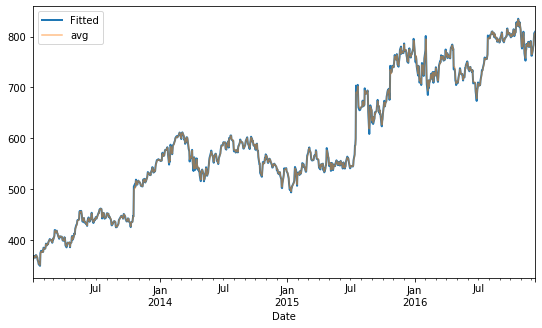

In [0]:
fitted_vals = pd.Series(fitted_vals, index = y_train.index[:-13])
fitted_vals.plot.line(legend=True, label='Fitted', lw=2)
y_train[:-13].plot.line(legend=True, alpha = .5)

In [0]:
train_rmse = sqrt(mean_squared_error(raw_values[:-13], fitted_vals))
print('Train RMSE: %.3f' % train_rmse)

Train RMSE: 1.595


### Model focused on minizing Test Error, compromising fit of the training data

Test RMSE: 8.614


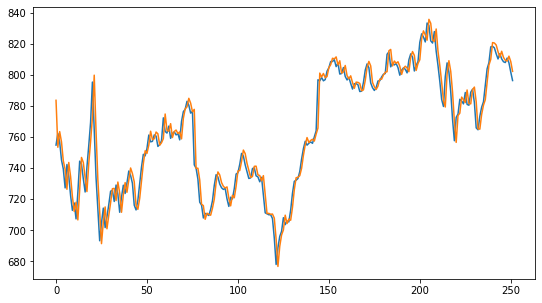

In [0]:
# split data into train and test-sets
train1, test1 = supervised_values[0:-252], supervised_values[-252:]

# transform the scale of the data
scaler, train_scaled1, test_scaled1 = scale(train1, test1)

# fit the model
lstm_model1 = fit_lstm(train_scaled1, 1, 10, 4)
# forecast the entire training dataset to build up state for forecasting
train_reshaped1 = train_scaled1[:, 0].reshape(len(train_scaled1), 1, 1)
lstm_model1.predict(train_reshaped1, batch_size=1)

# walk-forward validation on the test data
predictions1 = list()
for i in range(len(test_scaled1)):
	# make one-step forecast
	X1, y1 = test_scaled1[i, 0:-1], test_scaled1[i, -1]
	yhat1 = forecast_lstm(lstm_model1, 1, X1)
	# invert scaling
	yhat1 = invert_scale(scaler, X1, yhat1)
	# invert differencing
	yhat1 = inverse_difference(raw_values, yhat1, len(test_scaled1)+1-i)
	# store forecast
	predictions1.append(yhat1)
	expected1 = raw_values[len(train1) + i + 1]
	# print('12/%d/16, Predicted=%f, Expected=%f' % (i+1 + 12, yhat, expected))

# report performance
rmse1 = sqrt(mean_squared_error(raw_values[-252:], predictions1))
print('Test RMSE: %.3f' % rmse1)
# line plot of observed vs predicted
pyplot.plot(raw_values[-252:]) # orange line 
pyplot.plot(predictions1)
# pyplot.plot.legend()
pyplot.show()

In [0]:
lstm_fitted1 = lstm_model1.predict(train_reshaped1, batch_size=1)
fitted_vals1 = []

for i in range(len(train_scaled1)):
  X1, y1 = train_scaled1[i, 0:-1], lstm_fitted1[i]
  yhat1 = invert_scale(scaler, X1, y1)
  yhat1 = inverse_difference(raw_values, yhat1, -i)
  fitted_vals1.append(yhat1)

fitted_vals1[0:5]

[361.68619575828313,
 364.1605902653187,
 368.5483917917311,
 368.5396780676395,
 366.0267545413226]

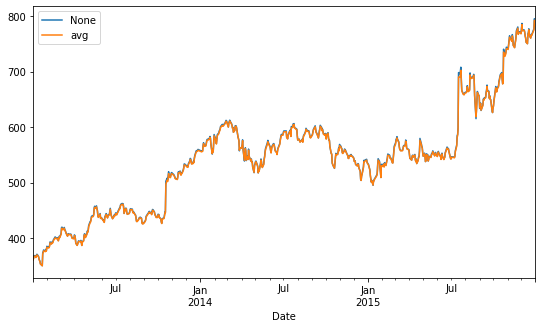

In [0]:
fitted_vals1 = pd.Series(fitted_vals1, index = y_train.index[:-253])
fitted_vals1.plot.line(legend=True)
y_train[:-252].plot.line(legend=True)

In [0]:
train_rmse1 = sqrt(mean_squared_error(raw_values[:-253], fitted_vals1))
print('Train RMSE: %.3f' % train_rmse1)


Train RMSE: 1.405


## Model Evaluation

In [0]:
from sklearn.model_selection import TimeSeriesSplit

def evaluate_model(model_name, y, gls_exogenous = exo):

  errors = []
  splits = TimeSeriesSplit(n_splits = 5)
  
  for train_index, test_index in splits.split(y):
    train_data = y[train_index]
    test_data = y[test_index]

    if model_name == 'linear' or model_name == 'polynomial' or model_name == 'GLS': 
      train_dates = googl_four_df.iloc[train_index]['avg'].index
      test_dates = googl_four_df.iloc[test_index]['avg'].index
      t_train = generate_t(train_dates)
      t_test = generate_t(test_dates)

      # testing and training linear model 
      if model_name == 'linear':
        model = LinearRegression()
        model.fit(X = t_train.to_frame(), y = train_data)
        fitted_vals = model.predict(t_train.to_frame())
        pred_vals = model.predict(t_test.to_frame())

      # testing and training polynomial model (3rd degree, 12 periods)
      elif model_name == 'polynomial':
        pipeline = make_pipeline(
            make_union(
                PolynomialFeatures(degree=3, include_bias=False),
                FunctionTransformer(lambda t: np.sin(2 * 12 * np.pi * t)),
                FunctionTransformer(lambda t: np.cos(2 * 12 * np.pi * t))
            ),
            LinearRegression()
        )
        pipeline.fit(X=t_train.to_frame(), y=train_data)
        fitted_vals = pipeline.predict(t_train.to_frame())
        pred_vals = pipeline.predict(t_test.to_frame())   

      # GLS evaluation
      elif model_name == 'GLS':
        e_train = gls_exogenous.loc[train_dates]
        e_test = gls_exogenous.loc[test_dates]
        e_train.index = train_data.index
        # print(train_data.index, '\n', e_train.index)
        gls = sm.GLS(endog = train_data, exog = e_train)
        gls_fit = gls.fit()
        fitted_vals = gls_fit.predict(e_train)
        pred_vals = gls_fit.predict(e_test)

    elif model_name == 'ARIMA':
      model_arima = ARIMA(train_data, order=(1,1,1))#, freq = 'D')
      model_arima_fit = model_arima.fit(trend='nc')

      # extract fitted values from arima 
      f = model_arima_fit.predict()
      fitted_vals = []
      for i in range(len(f)):
        fi = inverse_difference(train_data, f[i], -i)
        fitted_vals.append(fi)
      
      # extract prediction for test data 
      test_start = len(train_data)
      test_end = test_start + len(test_data) - 1
      forc = model_arima_fit.predict(start= test_start, end = test_end)
      pred_vals = []
      for i in range(len(forc)):
        fi_p = inverse_difference(test_data, forc[i], -i)
        pred_vals.append(fi_p)

      fitted_vals = np.asarray(fitted_vals)
      train_data = train_data[:-1]

    # SARIMA evaluation
    elif model_name == 'SARIMA':
      mod = sm.tsa.statespace.SARIMAX(train_data, order=(1, 1, 1), seasonal_order=(1, 1, 1, 12), 
                                            enforce_stationarity=False, enforce_invertibility=False)
      mod_fit = mod.fit()
      fitted_vals = mod_fit.get_prediction().predicted_mean
      pred_vals = mod_fit.get_forecast(steps = len(test_data)).predicted_mean

    # LSTM evaluation
    elif model_name == 'LSTM':
      
      raw_values = train_data.append(test_data).values 

      raw_train_values = train_data.values
      diff_train_values = difference(raw_train_values, 1)

      raw_test_values = test_data.values
      diff_test_values = difference(raw_test_values, 1)

      supervised_train = timeseries_to_supervised(diff_train_values, 1)
      supervised_test = timeseries_to_supervised(diff_test_values, 1)

      supervised_train_val = supervised_train.values
      supervised_test_val = supervised_test.values

      scaler, train_scaled, test_scaled = scale(supervised_train_val, supervised_test_val)

      lstm_model = fit_lstm(train_scaled, 1, 10, 4)
      train_reshaped = train_scaled[:, 0].reshape(len(train_scaled), 1, 1)
      lstm_model.predict(train_reshaped, batch_size=1)

      fitted_vals = []
      for i in range(len(train_scaled)):
        X, y1 = train_scaled[i, 0:-1], lstm_fitted[i]
        yhat = invert_scale(scaler, X, y1)
        yhat = inverse_difference(raw_values, yhat, -i)
        fitted_vals.append(yhat)

      pred_vals = []
      for i in range(len(test_scaled)):
        X, y2 = test_scaled[i, 0:-1], test_scaled[i, -1]
        yhat = forecast_lstm(lstm_model, 1, X)
        yhat = invert_scale(scaler, X, yhat)
        yhat = inverse_difference(raw_values, yhat, len(test_scaled)+1-i)
        pred_vals.append(yhat)

      train_data = train_data[:-1]
      test_data = test_data[:-1]
        
    else:
      raise ValueError('Enter one of the following valid models: linear, polynomial, GLS, ARIMA, SARIMA, LSTM')

    train_error = mean_squared_error(fitted_vals, train_data) ** .5 
    test_error = mean_squared_error(pred_vals, test_data) ** .5 
    errors.append([train_error, test_error])

  return pd.DataFrame(data= errors, columns=['train error', 'test error'])


In [0]:
def generate_t(dates):
  return dates.year + (30 * (dates.month - 1) + dates.day) / 365

In [0]:
linear_evaluation = evaluate_model('linear', y_train)
polynomial_evaluation = evaluate_model('polynomial', y_train)
gls_evaluation = evaluate_model('GLS', y_train)
arima_evaluation = evaluate_model('ARIMA', y_train)
sarima_evaluation = evaluate_model('SARIMA', y_train)
lstm_evaluation = evaluate_model('LSTM', y_train)

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


In [0]:
all_evals = {'linear' : linear_evaluation, 
             'polynomial':polynomial_evaluation, 
             'GLS':gls_evaluation, 
             'ARIMA':arima_evaluation,
             'SARIMA':sarima_evaluation, 
             'LSTM':lstm_evaluation}
test_errors = pd.Series()
train_errors = pd.Series() 

for k in all_evals: 
  cur = all_evals[k]
  test_errors[k] = cur['test error'].mean()
  train_errors[k] = cur['train error'].mean()

all_errors = pd.concat([test_errors, train_errors], axis=1)
all_errors.columns = ['avg test error', 'avg train error']
all_errors.sort_values(by='avg test error')

,avg test error,avg train error
ARIMA,0.079866,1.141291
LSTM,1.584603,1.403297
SARIMA,65.066475,22.948108
linear,70.307618,34.491820
polynomial,156.077550,27.017984
GLS,5957.358042,29.342050


# Part 5: Sentiment Analysis

## Afinn Lexicon


In [0]:
!pip install afinn

In [0]:
from afinn import Afinn
from nltk.corpus import gutenberg
import textwrap
afinn = Afinn()

In [0]:
sent = []
for i in range(0,len(articles_df["headline.main"])):
  x = afinn.score(articles_df["headline.main"][i])
  sent.append(x)

sentiments = pd.DataFrame()
sentiments["sentiments"] = pd.Series(sent)

In [0]:
article_sentiments = sentiments.join(articles_df)

In [0]:
for i in range(0,len(article_sentiments["pub_date"])):
  article_sentiments["pub_date"].iloc[i] = article_sentiments["pub_date"].iloc[i][0:10]

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [0]:
article_sentiments["Year"] = [i[0:4] for i in article_sentiments["pub_date"]]
article_sentiments["Month"] = [i[5:7] for i in article_sentiments["pub_date"]]


In [0]:
yearly_sentiments = article_sentiments[article_sentiments["sentiments"] != 0].groupby(["Year","Month"])["sentiments"].mean()

In [0]:
yearly_sentiments = yearly_sentiments.to_frame().reset_index()

In [0]:
googl_senti = googl_four_df.reset_index()
new = googl_senti["Date"].astype(str).str.split("-",expand = True)
googl_senti["Year"] = new[0].astype(str)
googl_senti["Month"] = new[1].astype(str)
googl_senti["Day"] = new[2].astype(str)

In [0]:
googl_senti.head()

,Date,Open,High,Low,Close,Volume,OpenInt,avg,Year,Month,Weekday Name,Day
0,2013-01-02,359.71,363.50,358.28,361.62,5083536,0,360.890,2013,01,Wednesday,02
1,2013-01-03,362.32,365.96,360.36,361.84,4636280,0,363.160,2013,01,Thursday,03
2,2013-01-04,364.67,370.74,363.84,368.98,5527104,0,367.290,2013,01,Friday,04
3,2013-01-07,367.72,369.69,365.29,367.38,3311534,0,367.490,2013,01,Monday,07
4,2013-01-08,367.77,368.15,362.22,366.65,3352074,0,365.185,2013,01,Tuesday,08


In [0]:
yearly_sentiments["Year"] = yearly_sentiments["Year"].astype(str)
yearly_sentiments["Month"] = yearly_sentiments["Month"].astype(str)

In [0]:
googl_senti = pd.merge(googl_senti,yearly_sentiments, how = "left", left_on = ["Year", "Month"], right_on = ["Year", "Month"])

In [0]:
googl_senti.set_index("Date",inplace= True)

In [0]:
# Convert dates to a decimal year
date = googl_senti.index
t = date.year + (30 * (date.month - 1) + date.day) / 365
# t = date.year + (date.month / 12)
t

Float64Index([2013.0054794520547, 2013.0082191780823, 2013.0109589041097,
              2013.0191780821917,  2013.021917808219, 2013.0246575342467,
               2013.027397260274, 2013.0301369863014, 2013.0383561643835,
               2013.041095890411,
              ...
              2016.9479452054795, 2016.9561643835616,  2016.958904109589,
              2016.9616438356165,  2016.964383561644, 2016.9671232876713,
               2016.978082191781, 2016.9808219178083, 2016.9835616438356,
               2016.986301369863],
             dtype='float64', name='Date', length=1008)

In [0]:
googl_senti['t'] = t
exo = googl_senti[['t', 'Weekday Name', 'Month',"sentiments"]]
exo = pd.get_dummies(exo)
exo

,t,sentiments,Weekday Name_Friday,Weekday Name_Monday,Weekday Name_Thursday,Weekday Name_Tuesday,Weekday Name_Wednesday,Month_01,Month_02,Month_03,Month_04,Month_05,Month_06,Month_07,Month_08,Month_09,Month_10,Month_11,Month_12
Date,,,,,,,,,,,,,,,,,,,
2013-01-02,2013.005479,1.0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0
2013-01-03,2013.008219,1.0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2013-01-04,2013.010959,1.0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2013-01-07,2013.019178,1.0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2013-01-08,2013.021918,1.0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-12-23,2016.967123,0.6,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2016-12-27,2016.978082,0.6,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1
2016-12-28,2016.980822,0.6,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1


In [0]:
from sklearn.model_selection import TimeSeriesSplit
errors = []
splits = TimeSeriesSplit(n_splits = 5)
y_train = googl_senti['avg']
for train_index, test_index in splits.split(y_train):
  train_data = y_train[train_index]
  test_data = y_train[test_index]

train_dates = googl_senti.iloc[train_index]['avg'].index
test_dates = googl_senti.iloc[test_index]['avg'].index
e_train = exo.iloc[1:864]
e_test = exo.iloc[864:1007]

In [0]:
yearly_sentiments["day"] = "01"
yearly_sentiments["Date"] = (yearly_sentiments["Year"] + "-" +
                             yearly_sentiments["Month"] + "-" +
                             yearly_sentiments["day"])
yearly_sentiments["Date"] = pd.to_datetime(yearly_sentiments["Date"])

In [0]:
yearly_sentiments.set_index("Date", inplace = True)

In [0]:
from statsmodels.tsa.arima_model import ARIMA
resid_inter = ARIMA(gls_fit.resid,order=(1,1,1))
print(resid_inter.fit().summary())

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


                             ARIMA Model Results                              
Dep. Variable:                    D.y   No. Observations:                 1007
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -3536.242
Method:                       css-mle   S.D. of innovations              8.107
Date:                Tue, 17 Mar 2020   AIC                           7080.484
Time:                        00:51:40   BIC                           7100.143
Sample:                             1   HQIC                          7087.954
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0083      0.288      0.029      0.977      -0.556       0.573
ar.L1.D.y     -0.1165      0.232     -0.502      0.616      -0.571       0.338
ma.L1.D.y      0.2584      0.226      1.143      0.2

In [0]:
avg_price_month = googl_four_df.groupby(["Year","Month"])["avg"].mean().reset_index()
avg_price_month

,Year,Month,avg
0,2013,1,367.085000
1,2013,2,392.765000
2,2013,3,409.154000
3,2013,4,397.442727
4,2013,5,438.035000
5,2013,6,438.733500
6,2013,7,450.492273
7,2013,8,438.226364
8,2013,9,442.164250
9,2013,10,468.663261


In [0]:
avg_price_month["day"] = "01"
avg_price_month["Date"] = (avg_price_month["Year"].astype(str) + "-" +
                             avg_price_month["Month"].astype(str) + "-" +
                             avg_price_month["day"].astype(str))

In [0]:
avg_price_month.set_index("Date", inplace = True)

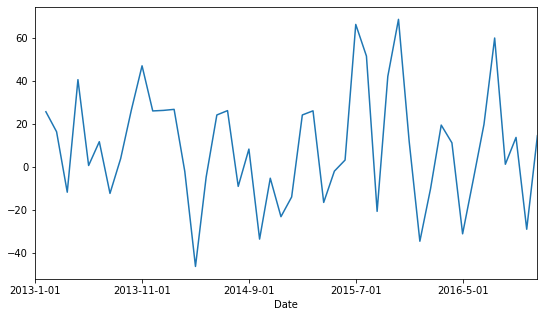

In [0]:
(avg_price_month['avg'].diff(1)).plot()

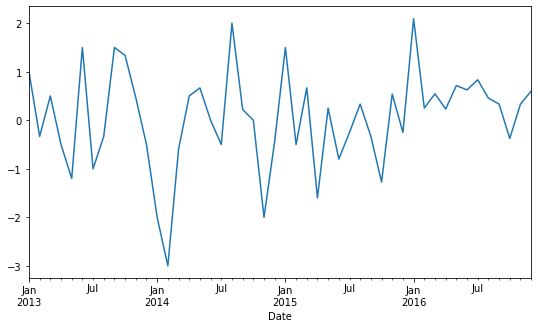

In [0]:
y_train_ = pd.Series(
    yearly_sentiments["sentiments"]
)

# Plot the data and the fitted trend
y_train_.plot.line()

Text(0, 0.5, 'Sentiment Value')

<Figure size 648x360 with 0 Axes>

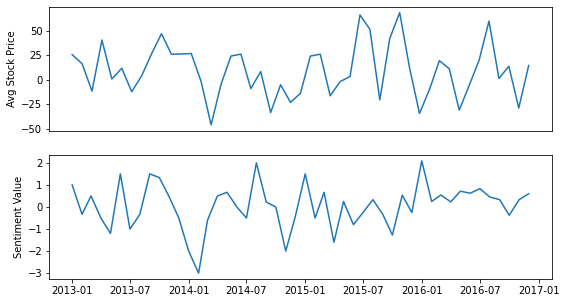

In [0]:
plt.figure()
f, axes = plt.subplots(2, 1)
axes[0].plot(avg_price_month['avg'].diff(1))
axes[0].set_ylabel('Avg Stock Price')
axes[0].tick_params(axis = 'x', bottom = False, labelbottom = False)

axes[1].plot(y_train_)
axes[1].set_ylabel('Sentiment Value')